<a href="https://colab.research.google.com/github/st7ma784/image-builder/blob/main/Jamescode_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading data entries:  2275
Filename err found: H2O.r1.90theta153.0.out
Energy Value Range: -76.0242882171 - -75.5574154632 
Bond Length Range: 0.7 - 1.9
Bond Angles Range : 0.0 - 60.0
E0 is -75.5574154632 Hartrees
Theta0 is : [60.]
R 0 is : [1.9]


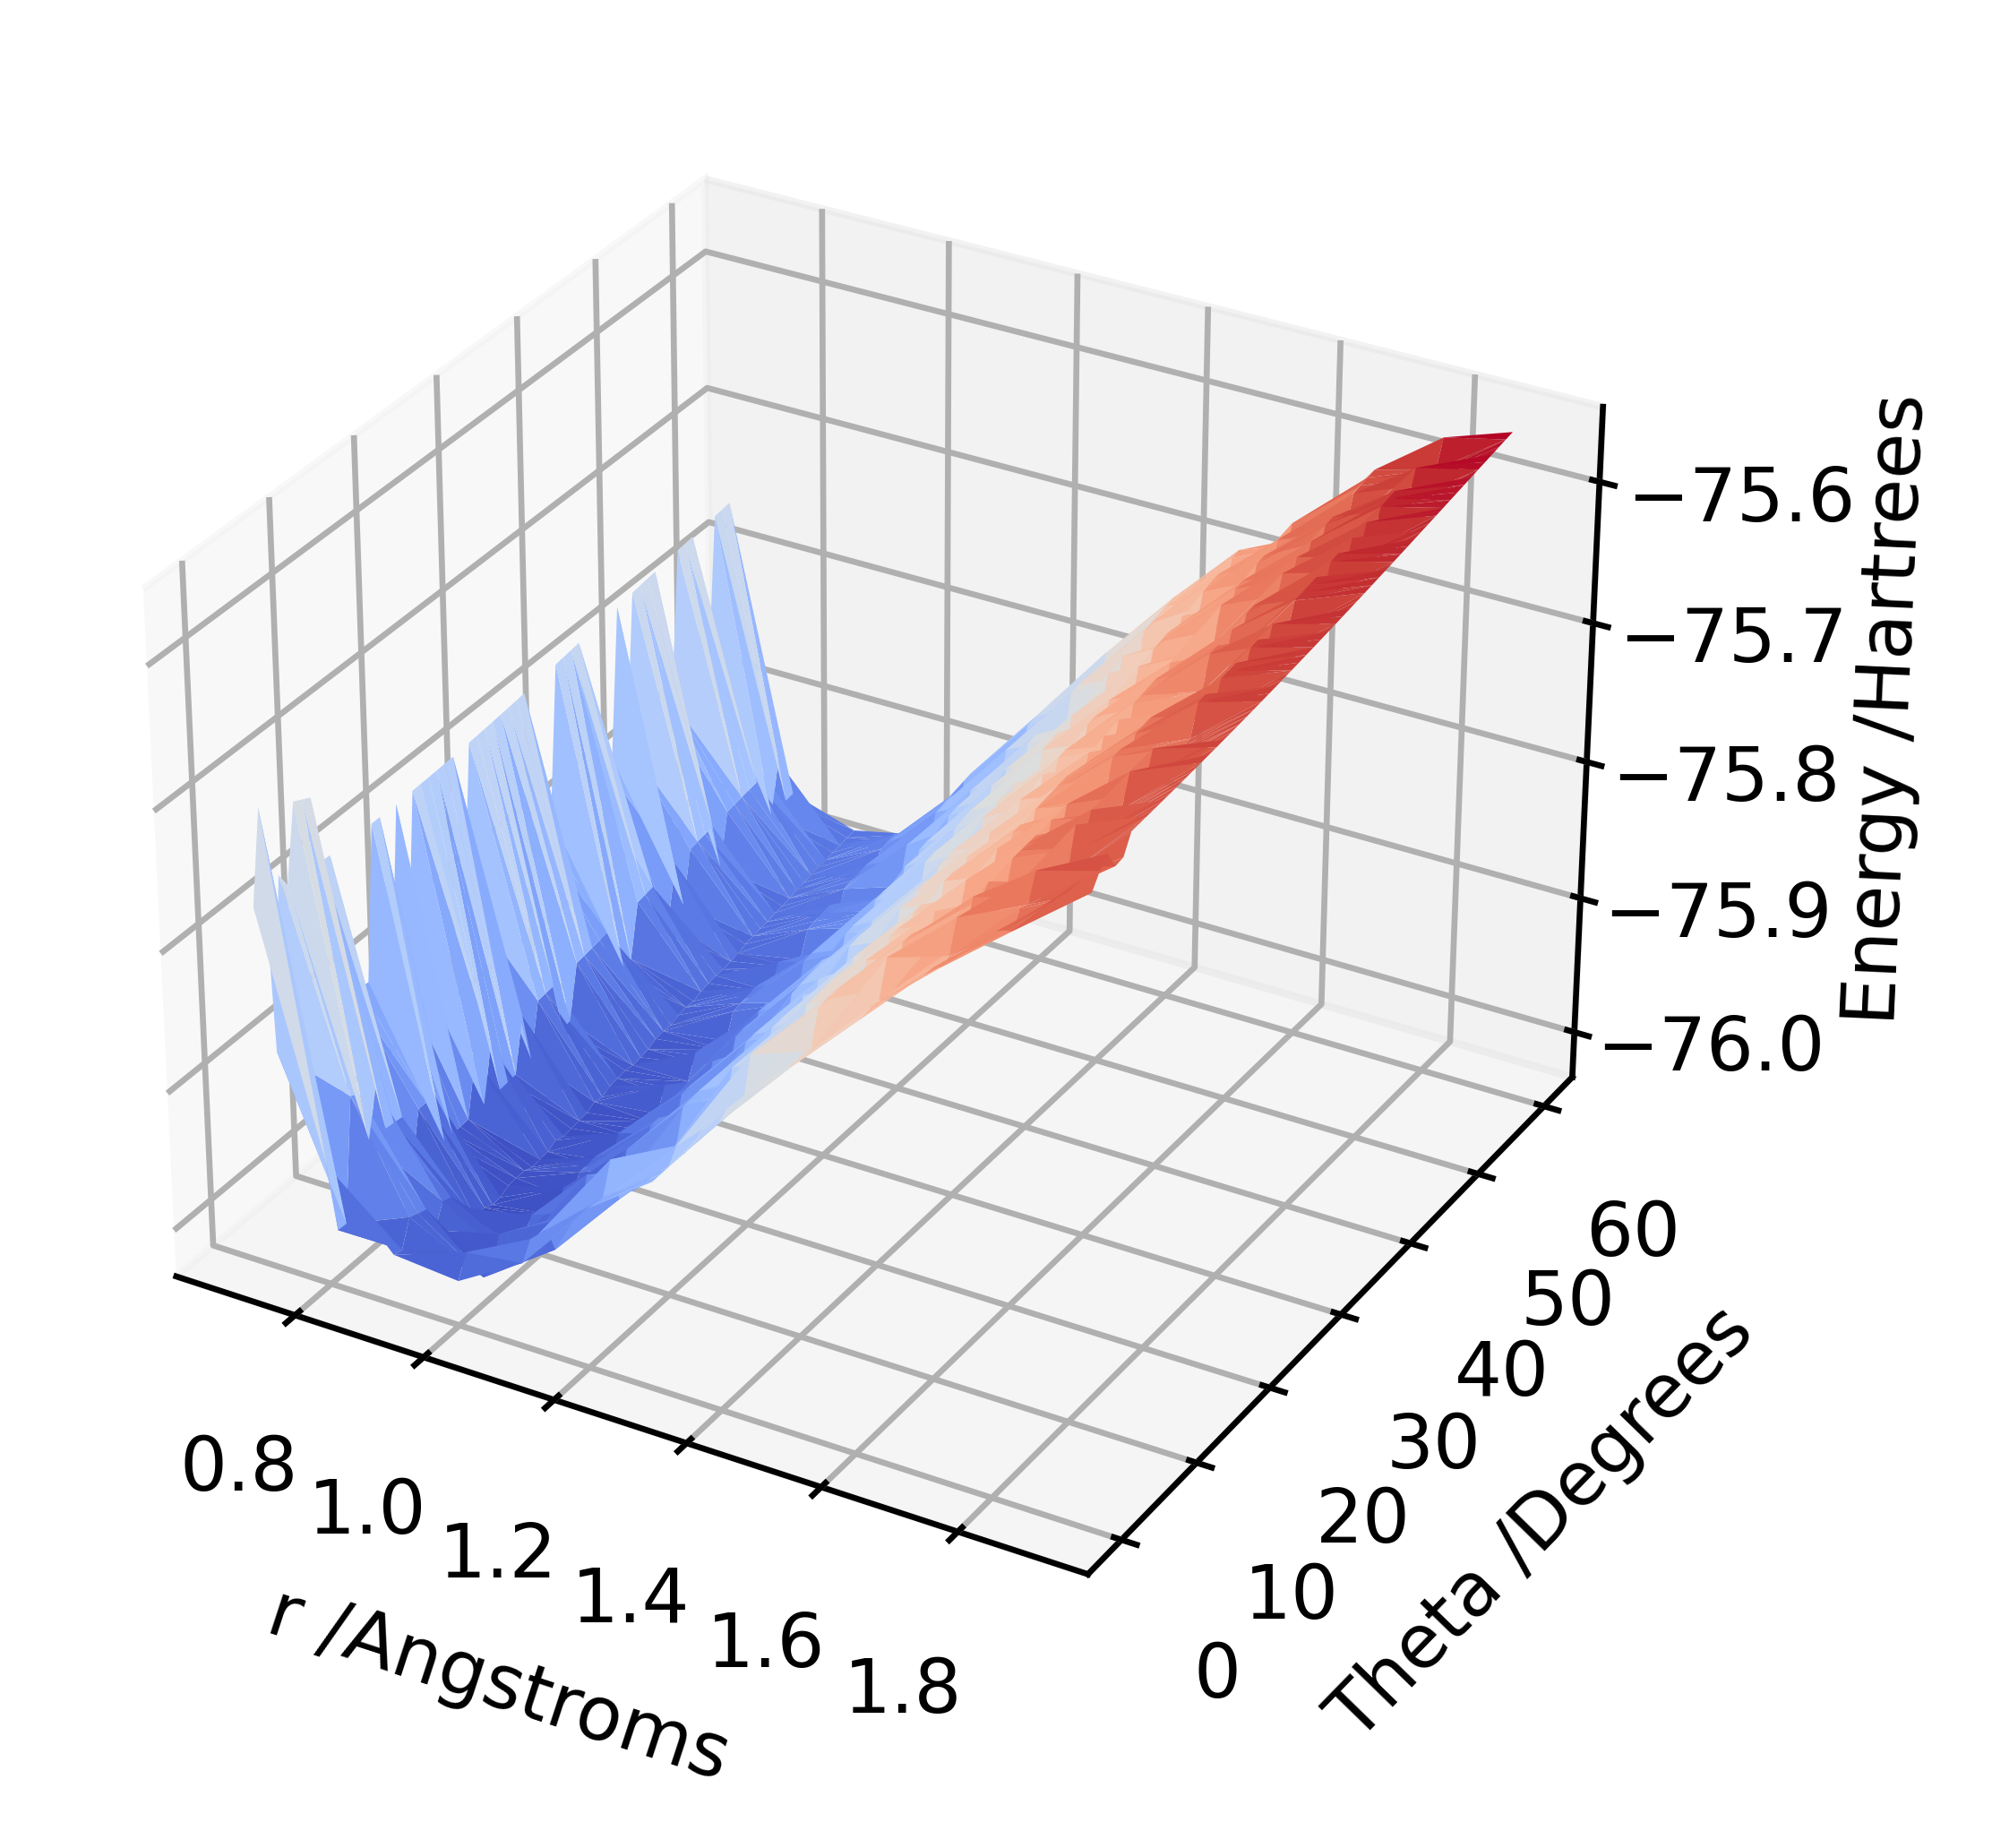

In [64]:
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
import os
class Bonds():
  oneotwopi= 1/(2*np.pi) #set as class constant so we don't have to constatntly recalculate. Access as Bonds.oneotwopi
  const=2* np.sqrt(oneotwopi) # calculate once.... and only once. store result. 
  def __init__(self, folder):
    self.Bond_Length = [] #Three variables created for extracting data
    self.Bond_Angle = []
    self.Energy_Values = []
    print("Reading data entries:  {}".format(len(os.listdir(folder))))
   #print("Reading data from {}".format(os.listdir(folder)))
    for filename in os.listdir(folder):
      #get r and theta from filename. 
      filepath=os.path.join(folder,filename)
      with open(filepath , 'r') as f:
        try:
          lines = f.readlines()
          r=float(filename[5:8])   # get r value from the filename   will throw error if not an int. 
          #print(r)
          a=float(filename[15:-4]) # get a value from the filename
          #print(a)
          self.Energy_Values.append(float(lines[167][22:36]))

          self.Bond_Length.append(r) #Create Angle/Lengths lists and extract energies
          self.Bond_Angle.append(a)
        except:
          #if float(lines[167][22:36]):
          print("Filename err found: {}".format(filename))
          read= lines[168][22:36]
          if float(read) is not None:
            self.Energy_Values.append(float(read))
            self.Bond_Length.append(r)
            self.Bond_Angle.append(a)
            #Find where the max (min) energy is
    self.Energy_Values=np.array(self.Energy_Values, dtype=float)
    self.Bond_Lengths=np.array(self.Bond_Length, dtype=float)
    self.Bond_Angles=np.array(self.Bond_Angle,dtype=float)
    print("Energy Value Range: {} - {} ".format(np.amin(self.Energy_Values), np.amax(self.Energy_Values)))
    print("Bond Length Range: {} - {}".format(np.amin(self.Bond_Lengths), np.amax(self.Bond_Lengths)))
    print("Bond Angles Range : {} - {}".format(np.amin(self.Bond_Angles), np.amax(self.Bond_Angles)))
    self.points=np.stack((self.Bond_Lengths, self.Bond_Angles,self.Energy_Values), axis=1)
    #self.points.sort(axis=1)
    self.e_zero = np.amax(self.Energy_Values)
    self.indexs = np.where(self.Energy_Values == self.e_zero)  #store all indexs where e is maximum value. 
    self.theta_zero = self.Bond_Angles[self.indexs]
    self.r_zero = self.Bond_Lengths[self.indexs]
    self.Energy_Values = self.Energy_Values[self.indexs]
    print("E0 is " + str(self.e_zero) + " Hartrees")
    print("Theta0 is : {}".format(self.theta_zero))
    print("R 0 is : {}".format(self.r_zero))

  def plotGraph(self):
    
    plt.figure(dpi=600)
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(self.points[:,0], self.points[:,1], self.points[:,2], cmap=cm.coolwarm) #Plot surface
    ax.set_xlabel('r /Angstroms') #Axes labels
    ax.set_ylabel('Theta /Degrees')    
    ax.set_zlabel('Energy /Hartrees')    
    
    
  def v_calculator(self, L_zero:float, n: float,coeff): # do you need l_zero, n or p? are these definable in the __init__ function 

    #the beauty of things like np.sqrt()  is it can take a whole array np.sqrt(np.array([4,4,4])) returns np.array([2,2,2]) - it means you can run bits like this lightning fast! 
    k = coeff #this was k*4 be simplified to sqrt(4) * out,   i.e 2*out
    intermediate= k/(L_zero**2)
    #sqrt(a*b) = sqrt(a) * sqrt(b)
    #so we can actuall do const * sqrt(intermediate) where const=2*np.sqrt(bonds.oneotwopi)
    return Bonds.const* np.sqrt(intermediate)  
     
  def variable_finder(self, l, m): # 0 value,   any theta    for r= zero, look for poly fit, get zeroth coeeff as k.   use k to find v. 

      l_energy=self.Energy_Values[self.indexs]    # find energy values for each index of l_zero.   (This can be sped up with torch.min() for indexes)
      l_angleslengths=self.Angles[self.indexs] 
      l_angleslengths= self.Angles-m_zero   # with numpy you can do this as an array, array -int   is faster than [i-a for i in array]
      p = np.polyfit(l_angleslengths, l_energy, 2)[0] #Finds coefficients to obtain Kt,  takes X coords, y Coords, and degree of fit. 
      if l == r:  # numerical calculation avoid str() if possible.  str(2) = "2" and is different to 2. 
          print("v2 is {}".format(v_calculator(l, p)))
      elif l == str(theta):
          # these both seem to do the same but with v1 or v2... not sure I understand this. 
          print("v1 is {}".format(v_calculator(l, p)))
  

if __name__=="__main__":
  path="C:\\Users\\st7ma\\Documents\\james\\image-builder\\data" # set thhis to local settings so we don't keep being asked.
  while not os.path.exists(path):  #If we dont have a valid path lets keep checking...  
    path=input("Where is the results folder? ")
  molecule="H2O"  # Set to a default value -  CHANGE THIS TO SILLY VALUE BEFORE SUBMITTING 
  while not os.path.exists(os.path.join(path,molecule)): # check folder exists before continuing. 
    molecule= input("Whats the molecule name? (if not included in upper file path)")

  bonddata=Bonds(os.path.join(path,molecule))
  bonddata.plotGraph()

For the following file(s) the energy was not on the expected line: H2O.r1.90theta153.0.out
E0 is -76.0242882171 Hartrees


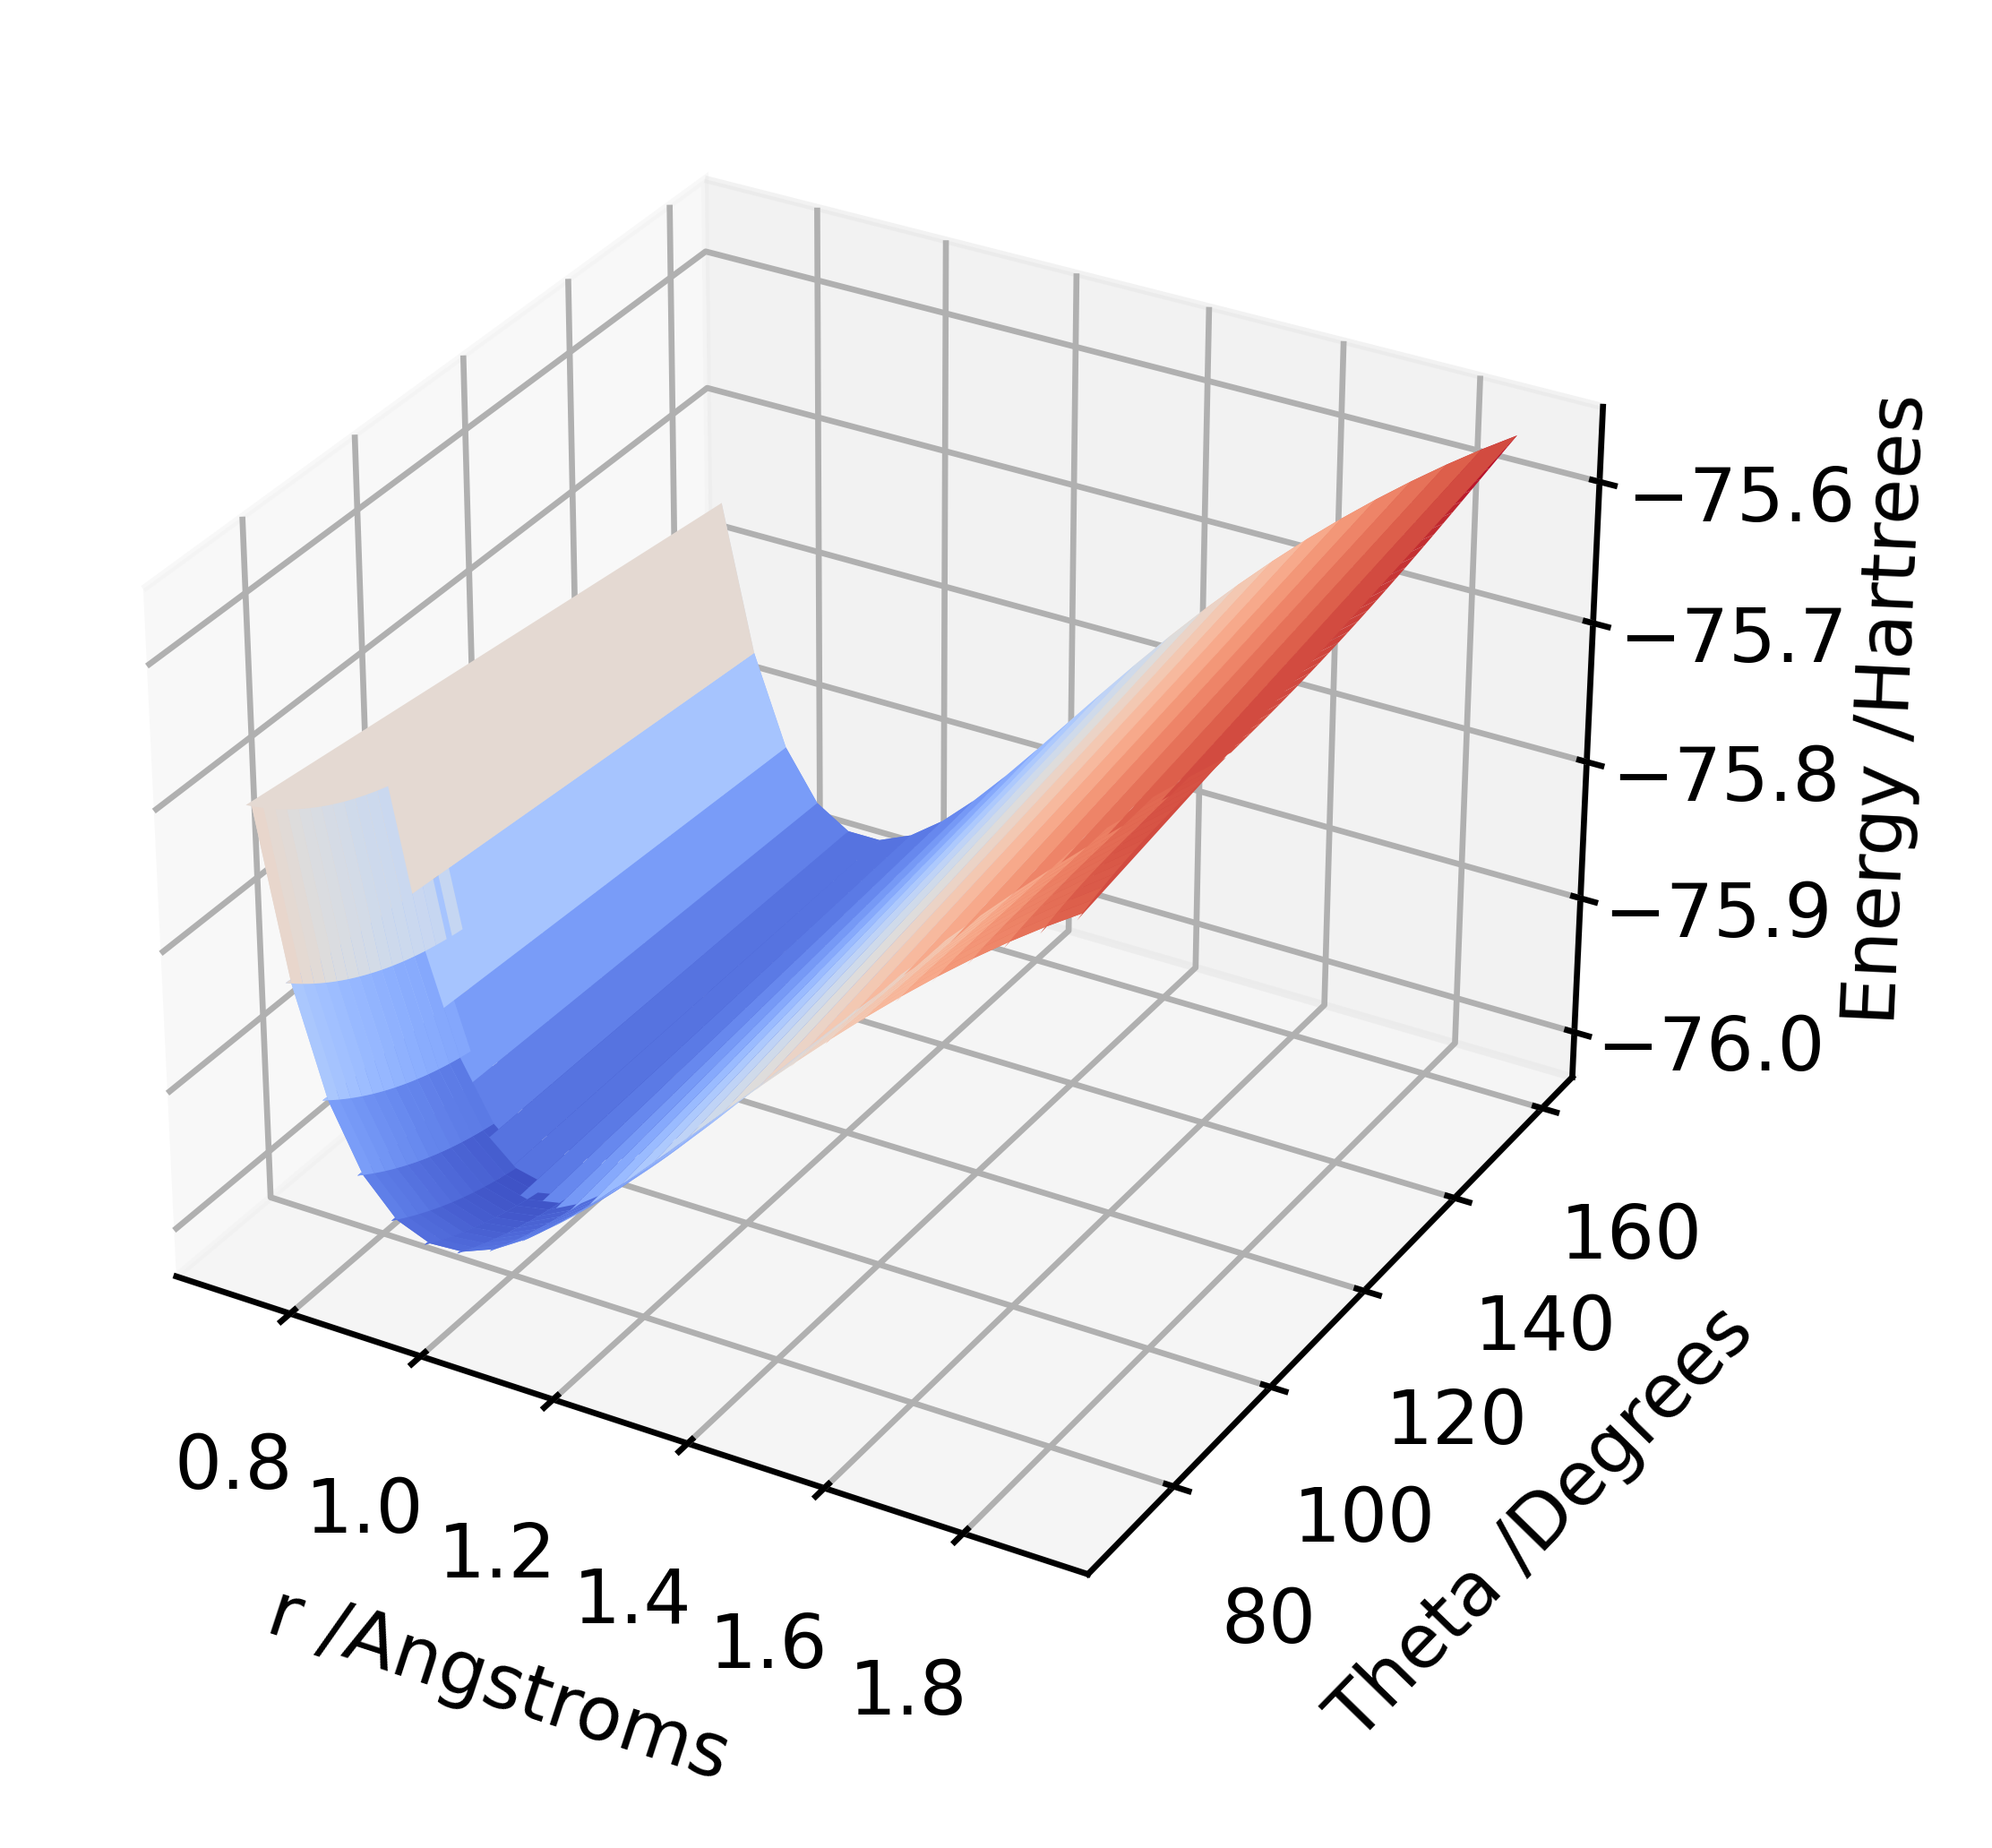

In [66]:

from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
import os
        
class Bonds(): #Declare class so variables can be used between functions
  def __init__(self,folder):

    self.Bond_Length = [] #Lists for data extraction
    self.Bond_Angle = []
    self.Energy_Values = []

    for filename in os.listdir(folder): #For each file in folder

        file = os.path.join(folder, str(filename)) #Create directory for each file
        
        with open(file, "r") as f: #Open each file
            try:
                
                lines = f.readlines()
                self.r=float(filename[5:9]) #r___ Bond lengths
                self.a=float(filename[14:-4]) # theta_____ Bond Angles
                self.Energy_Values.append(float(lines[167][22:36])) # Energies within files
                
            except:
                print("For the following file(s) the energy was not on the expected line: {}".format(filename))
                self.Energy_Values.append(float(lines[168][22:36])) #For some files the Energy is on a subsequent line (see r1.9, theta153)
            self.Bond_Length.append(self.r) #Push data into extraction lists
            self.Bond_Angle.append(self.a)

#    print(self.Bond_Length)
#    print(self.Bond_Angle)
    self.Energy_Values=np.array(self.Energy_Values, dtype=float) #Turning all data into floats
    self.Bond_Length=np.array(self.Bond_Length, dtype=float)
    self.Bond_Angle=np.array(self.Bond_Angle,dtype=float)
    self.e_zero = np.amin(self.Energy_Values)
    self.indexs = np.where(self.Energy_Values == self.e_zero) #Obtaining position and values for the minimum
    self.theta_zero = self.Bond_Angle[int(self.indexs[0])]
    self.r_zero = self.Bond_Length[int(self.indexs[0])]

    print("E0 is " + str(self.e_zero) + " Hartrees") #Minimum energy

  def plotGraph(self):
    
    plt.figure(dpi=600)
    ax = plt.axes(projection='3d')

    x = 25
    y = 91

    Lengths = np.reshape(self.Bond_Length, (x,y)) #Reshape for 3D graphing
    Angles = np.reshape(self.Bond_Angle, (x,y))
    Energies = np.reshape(self.Energy_Values, (x,y))

    ax.plot_surface(Lengths, Angles, Energies, cmap=cm.coolwarm) #Plot surface

    ax.set_xlabel('r /Angstroms') #Axes labels
    ax.set_ylabel('Theta /Degrees')    
    ax.set_zlabel('Energy /Hartrees')    
    #plt.xlim([0.65, 1.95])
    #plt.ylim([65, 165])

    
  def variableFinder(self, l, m): # Either sets (r-r_zero) to zero. Or sets (theta-theta_zero) to zero. --> Fits quadratic trend and finds coefficients for k1/k2 
        
    if l == "r": #r = r_zero
        Bond_l = list(self.Bond_Length)
        Bond_m = self.Bond_Angle
        l_zero = self.r_zero
        m_zero = self.theta_zero
    elif l == "theta": # theta = theta_zero
        Bond_l = list(self.Bond_Angle)
        Bond_m = self.Bond_Length
        l_zero = self.theta_zero
        m_zero = self.r_zero

    l_energy = []
    l_angleslengths = []



    for i in range(Bond_l.count(l_zero)): # For each value which matches r_zero or theta_zero
        where = [index for index, item in enumerate(Bond_l) if item == (l_zero)][i]
        l_energy.append(self.Energy_Values[where]) #Take its Energy
        l_angleslengths.append((Bond_m)[where]) #Take its angle (if r=r_zero) or take its length (if theta=theta_zero)

    for i in range(len(l_angleslengths)): #For polynomial of form: 0.5Kt(theta-theta_zero)^2 or 0.5Kr(r-r_zero)^2
        (l_angleslengths)[i] = (l_angleslengths)[i]-(m_zero)

    p = np.polyfit(l_angleslengths, l_energy, 2) #Finds coefficients to obtain Kt/Kr

    if l == "r":
        k = p[0]*2
        intermediate= k*2/(l_zero**2)
        v =  1/(2*np.pi) * intermediate **0.5 #v2 calculation
        print("v2 is " + str(v))
    elif l == "theta":
        k = p[0]*2
        v = 1/(2*np.pi) * (k/(2))**0.5 #v1 calculation
        print("v1 is " + str(v))

if __name__=="__main__":
  path="C:\\Users\\st7ma\\Documents\\james\\image-builder\\data" # set thhis to local settings so we don't keep being asked.
  while not os.path.exists(path):  #If we dont have a valid path lets keep checking...  
    path=input("Where is the results folder? ")
  molecule="H2O"  # Set to a default value -  CHANGE THIS TO SILLY VALUE BEFORE SUBMITTING 
  while not os.path.exists(os.path.join(path,molecule)): # check folder exists before continuing. 
    molecule= input("Whats the molecule name? (if not included in upper file path)")

  bonddata=Bonds(os.path.join(path,molecule))
  bonddata.plotGraph()
